In [167]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
import pickle
from sklearn.ensemble import RandomForestClassifier
import scipy.spatial.distance as spd
import sklearn.preprocessing as pp
from sklearn.decomposition import PCA
import numpy.linalg as la
from sklearn.neighbors import KNeighborsClassifier

In [131]:
D = dt.load_breast_cancer()
print(D.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [132]:
X = D.data
Y = D.target

X.shape

(569, 30)

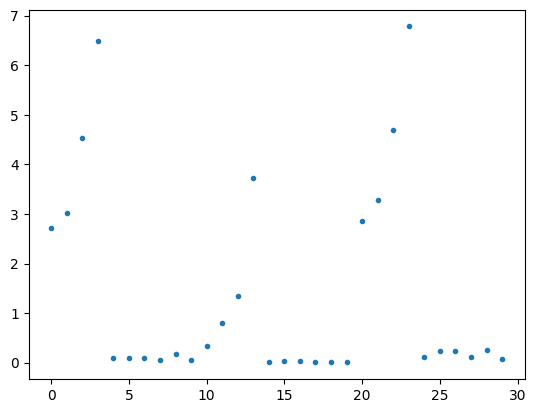

In [133]:
m = np.mean(X, axis=0)

plt.plot(np.log(m+1), '.')

In [134]:
Xn = X-m

np.mean(Xn, axis=0)

array([-1.10608652e-14, -2.84841473e-14, -1.72328467e-14, -3.17883583e-13,
        8.51325454e-17, -6.14500639e-17, -2.46824627e-17,  3.80968446e-17,
       -5.04624657e-17, -1.07315055e-17, -2.75311896e-16, -4.76088608e-16,
        3.76656332e-15, -3.37788770e-14, -2.21794610e-18, -6.67670371e-18,
        2.64873068e-17, -1.67679774e-18, -2.67068148e-18, -7.98003286e-19,
       -1.11826190e-14,  1.08204794e-14, -4.20581359e-14,  2.28772283e-13,
       -1.18753864e-16, -3.46237391e-16,  1.18631915e-16, -1.32680432e-17,
       -1.45314341e-16,  4.52552465e-17])

In [135]:
np.var(Xn, axis=0)

array([1.23970943e+01, 1.84663974e+01, 5.89402799e+02, 1.23625903e+05,
       1.97452073e-04, 2.78428549e-03, 6.34407875e-03, 1.50301462e-03,
       7.50222008e-04, 4.97611152e-05, 7.67671984e-02, 3.03781123e-01,
       4.08071149e+00, 2.06579462e+03, 8.99927022e-06, 3.20139261e-04,
       9.09596835e-04, 3.80055080e-05, 6.82128053e-05, 6.98938631e-06,
       2.33191693e+01, 3.77100918e+01, 1.12714643e+03, 3.23597671e+05,
       5.20403629e-04, 2.47112650e-02, 4.34475982e-02, 4.31314711e-03,
       3.82085668e-03, 3.25636075e-04])

In [136]:
s = 1 / np.std(Xn, axis=0)
s

array([2.84014196e-01, 2.32706713e-01, 4.11902002e-02, 2.84410261e-03,
       7.11654420e+01, 1.89514794e+01, 1.25549711e+01, 2.57939823e+01,
       3.65094340e+01, 1.41760406e+02, 3.60921002e+00, 1.81434390e+00,
       4.95030611e-01, 2.20017096e-02, 3.33346849e+02, 5.58895394e+01,
       3.31570229e+01, 1.62209666e+02, 1.21078504e+02, 3.78251342e+02,
       2.07082530e-01, 1.62843791e-01, 2.97858384e-02, 1.75791271e-03,
       4.38358913e+01, 6.36139717e+00, 4.79752353e+00, 1.52265974e+01,
       1.61778061e+01, 5.54158175e+01])

In [137]:
S = np.diag(s)
S.shape

(30, 30)

In [138]:
Xnn = np.dot(S, Xn.T).T
Xnn.shape

(569, 30)

In [139]:
np.std(Xnn,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [140]:
ss = pp.StandardScaler().fit(X)
Xn = ss.transform(X)

np.mean(Xn, axis=0)

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

In [141]:
np.std(Xn, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [142]:
D = pickle.load(open('data/MNISTsmall.p', 'rb'))
D.keys()

dict_keys(['data', 'target', 'DESCR', 'target_names', 'foldTrain'])

In [143]:
X = D.data
y = D.target

X.shape

(784, 15000)

In [144]:
Xn = pp.StandardScaler().fit_transform(X.T).T
Xn.shape

(784, 15000)

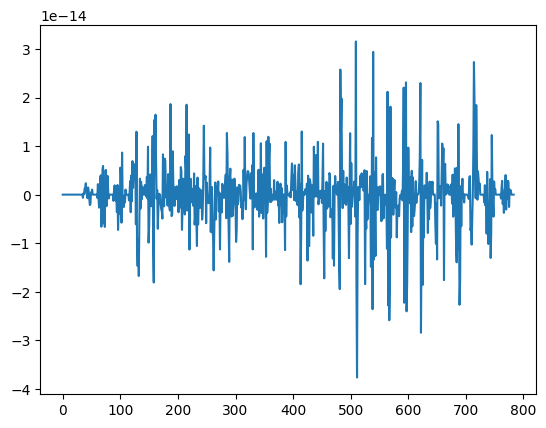

In [145]:
plt.plot(np.mean(Xn, axis=1))

In [146]:
s = np.std(X, axis=1)
s.shape

(784,)

In [147]:
S = np.diag(1/s)

C:\Users\rui\AppData\Local\Temp\ipykernel_14960\686881219.py:1: RuntimeWarning: divide by zero encountered in divide
  S = np.diag(1/s)


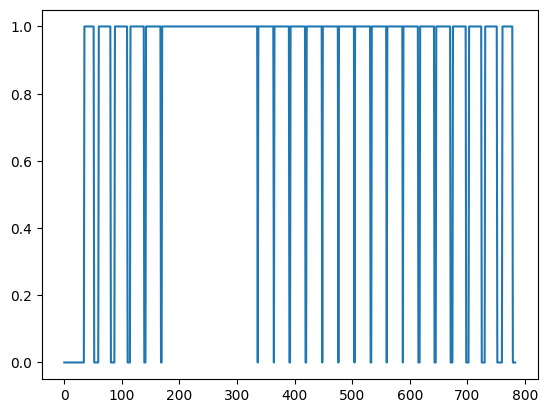

In [148]:
plt.plot(np.std(Xn, axis=1))

In [149]:
X=X*1.
X.dtype

dtype('float64')

In [150]:
idx = s == 0
np.sum(idx)

np.int64(108)

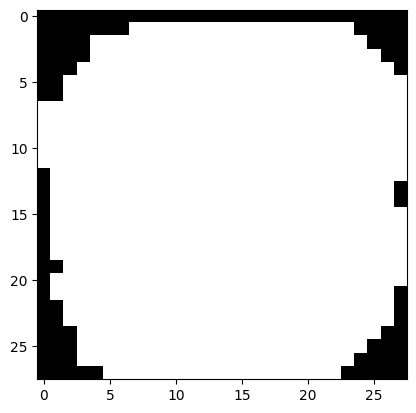

In [151]:
plt.imshow(idx.reshape(28,28), cmap='binary')

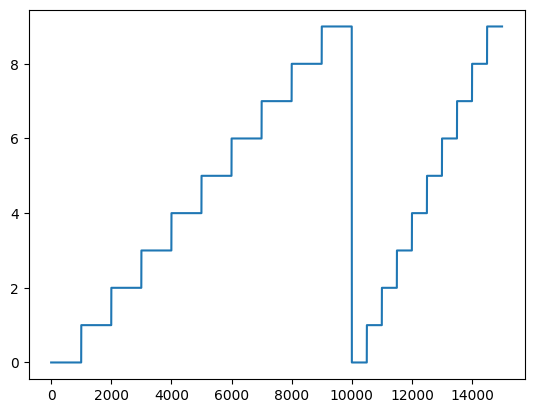

In [152]:
plt.plot(y)

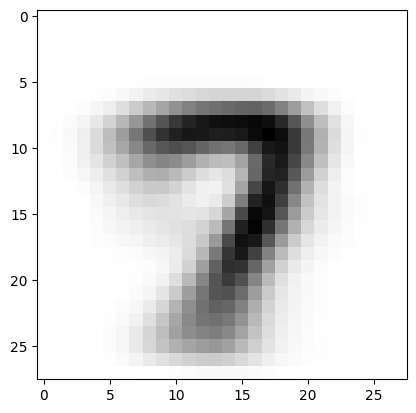

In [153]:
m7 = np.mean(X[:,y==7], axis=1)

plt.imshow(m7.reshape(28,28), cmap='binary')

c:\Users\rui\OneDrive - Instituto Politécnico de Lisboa\Faculdade\3º Ano\AA\codigo\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\rui\OneDrive - Instituto Politécnico de Lisboa\Faculdade\3º Ano\AA\codigo\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


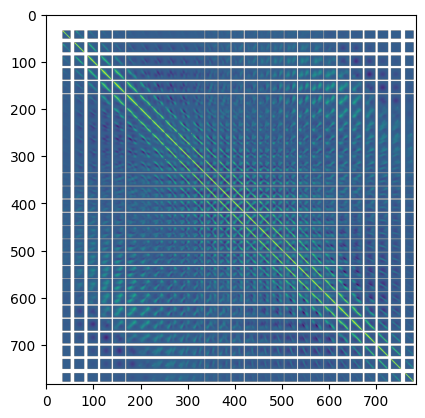

In [154]:
C = np.cov(X)
cc = np.corrcoef(X)
plt.imshow(cc)

In [155]:
cc[:5,:5]

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [156]:
u,W = la.eig(C)
W.shape

(784, 784)

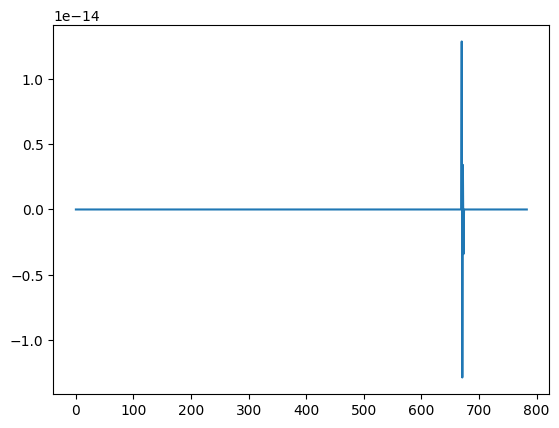

In [157]:
plt.plot(np.imag(u))

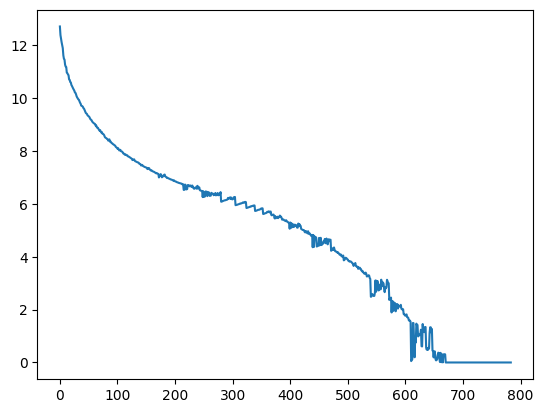

In [158]:
u = np.real(u)
plt.plot(np.log(u+1))

In [159]:
Xn = pp.StandardScaler().fit_transform(X.T).T
C = np.cov(Xn)
u,W = la.eig(C)
idx = np.argsort(-u)
u=u[idx]
W=W[:,idx]
W=W[:, u>1e-10]
W=np.real(W)
W.shape

(784, 670)

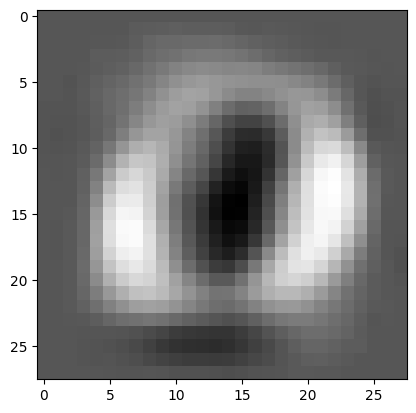

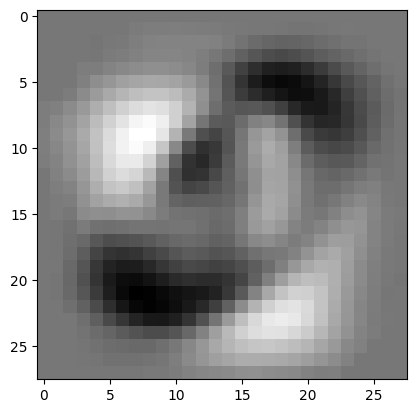

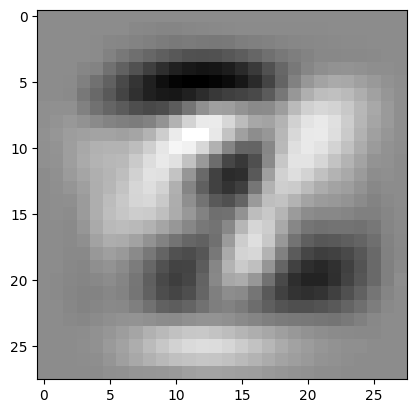

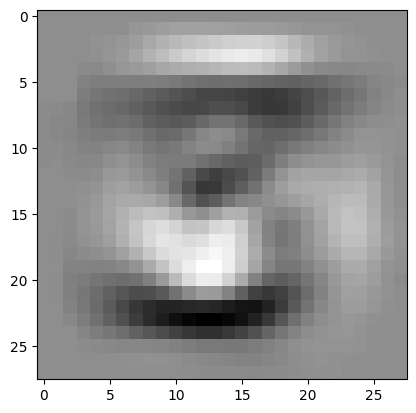

In [160]:
plt.figure()
plt.imshow(W[:,0].reshape(28,28), cmap='gray')
plt.figure()
plt.imshow(W[:,1].reshape(28,28), cmap='gray')
plt.figure()
plt.imshow(W[:,2].reshape(28,28), cmap='gray')
plt.figure()
plt.imshow(W[:,3].reshape(28,28), cmap='gray')

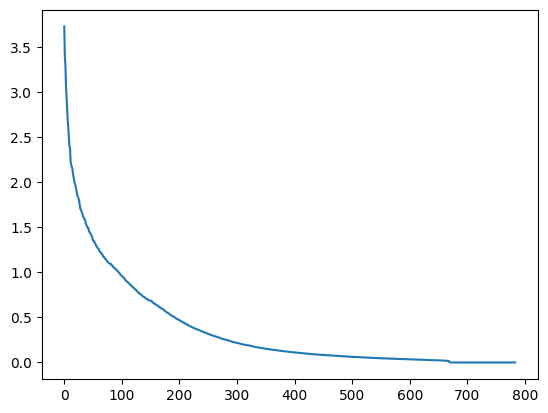

In [161]:
plt.plot(np.log(u+1))

In [162]:
Xp = np.dot(W.T, Xn)
Xp.shape

(670, 15000)

In [163]:
Cp = np.cov(Xp)

np.round(Cp[:8,:8], 3)

array([[40.58 ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   , -0.   ],
       [ 0.   , 28.926, -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ],
       [ 0.   , -0.   , 25.956, -0.   , -0.   , -0.   , -0.   , -0.   ],
       [-0.   ,  0.   , -0.   , 20.512, -0.   , -0.   , -0.   ,  0.   ],
       [-0.   , -0.   , -0.   , -0.   , 18.148, -0.   , -0.   ,  0.   ],
       [ 0.   , -0.   , -0.   , -0.   , -0.   , 15.65 , -0.   ,  0.   ],
       [ 0.   , -0.   , -0.   , -0.   , -0.   , -0.   , 13.583,  0.   ],
       [-0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   , 12.494]])

In [164]:
v = np.var(Xp, axis=1)
vn = v/np.sum(v)
vc = np.cumsum(vn)
vc

array([0.06002512, 0.10281206, 0.14120613, 0.17154684, 0.19839048,
       0.2215395 , 0.24163114, 0.2601123 , 0.27663556, 0.2913976 ,
       0.30595468, 0.31825583, 0.33002736, 0.34154428, 0.35279845,
       0.36338318, 0.37354961, 0.38338739, 0.39274318, 0.40195022,
       0.41081789, 0.41936207, 0.42758477, 0.43547501, 0.44325026,
       0.45087979, 0.45820919, 0.46515374, 0.47180651, 0.47836216,
       0.48477925, 0.49106259, 0.49719218, 0.50315475, 0.50903909,
       0.51485934, 0.52057776, 0.52605465, 0.53141363, 0.53666836,
       0.54185646, 0.54694256, 0.552013  , 0.55687812, 0.56166793,
       0.56639788, 0.57107077, 0.57566514, 0.58018112, 0.58454786,
       0.58878858, 0.59301824, 0.59720558, 0.60128719, 0.60533793,
       0.6092819 , 0.61317521, 0.61702002, 0.62080148, 0.6245496 ,
       0.62827524, 0.63187685, 0.63544943, 0.63900099, 0.64248233,
       0.64594863, 0.64937456, 0.65272712, 0.65602631, 0.6593174 ,
       0.66254568, 0.66573882, 0.66891969, 0.67203713, 0.67511

In [165]:
np.sum(vc<=.95)

np.int64(295)

In [166]:
vc[293:297]

array([0.94944357, 0.94982021, 0.95019362, 0.95056343])

In [177]:
Xp2=PCA(n_components=0.95).fit_transform(Xn.T).T
Xp2.shape

(296, 15000)

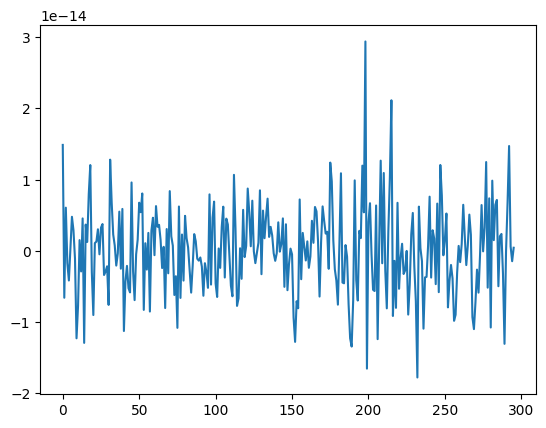

In [176]:
plt.plot(np.mean(Xp2, axis=1))

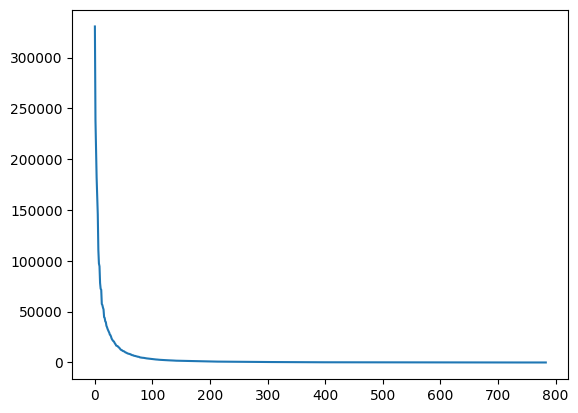

In [172]:
plt.plot(np.var(Xp2,axis=1))